## INDEX

<a id='back'></a>
Imports Data:  
<br/> 
<a href='#sql_serv'>Connects to SQL Server</a>  
<a href='#curncy'>Currencies Exchange Rates</a>  
<a href='#bbg'>Prices from Bloomberg License</a>  
<a href='#candi'>Countries and Industries</a>  
<a href='#fcur'>Functional Currencies</a>  
<a href='#tcur'>Trading Currencies</a>  
<a href='#mk'>Historical and Current Market Cap</a>  
<a href='#fd'>Fundamental Data and Estimates from SQL</a>  

Calculates:  
<br/> 
<a href='#1.b'>EPS Growth</a>  
<a href='#2.a'>P/E</a>  
<a href='#3.a'>ROE</a>  
<a href='#4.a'>EBITDA Growth</a>  
<a href='#4.b'>EV/EBITDA</a>  
<a href='#5.a'>ROIC</a>   
<a href='#6.a'>Upsides Compass</a>   
<a href='#6.b'>Upsides Chart</a>  
<a href='#7.'>Discount Rates</a>  
<br/> 
Consolidates Stock Guide 2.0:  
<br/> 
<a href='#merges'>Merges all DFs in one</a>  
<a href='#sg_ex'>Downloads SG 2.0 to Excel</a>


### I. IMPORTS DATA

SQL Connection<a id='sql_serv'></a>
[<a href='#back'>back</a>]

In [2]:
import urllib
import sqlalchemy
import pandas as pd
import numpy as np

params = urllib.parse.quote_plus("DRIVER={SQL Server};SERVER=CG-DSR-01;DATABASE=CGTEAM;trusted_connection=true")
engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
print('connected')

connected


Currencies Exchange Rates<a id='curncy'></a>
[<a href='#back'>back</a>]

In [3]:
query =" ".join([
    "SELECT YEAR(fecha_archivo) Year,fecha_archivo,instrumento,PX_LAST",
    "FROM [99.108.0.45].[Tools_Prd_03].[dbo].[Bloomberg_NAVAUM]",
    "WHERE instrumento IN ('CLP Curncy','COP Curncy','BRL Curncy','ARS Curncy','MXN Curncy')"])

Curncy = pd.read_sql_query(query, engine)
Curncy = pd.pivot_table(data=Curncy, index=['Year','fecha_archivo'],columns=['instrumento'], values='PX_LAST')
Curncy=Curncy.groupby(['Year']).max()
# CLP_actual=tc_h[CLP_h['fecha_archivo']==CLP_h['fecha_archivo'].max()]


Curncy_e=pd.DataFrame({'Year':[max(list(Curncy.index))+1,max(list(Curncy.index))+2,max(list(Curncy.index))+3,max(list(Curncy.index))+4],
                   'ARS Curncy':[Curncy.loc[max(list(Curncy.index))].iloc[0]*1.15,
                                 Curncy.loc[max(list(Curncy.index))].iloc[0]*1.15**2,
                                 Curncy.loc[max(list(Curncy.index))].iloc[0]*1.15**3,
                                 Curncy.loc[max(list(Curncy.index))].iloc[0]*1.15**4],
                    'BRL Curncy':[Curncy.loc[max(list(Curncy.index))].iloc[1]*1.02,
                                 Curncy.loc[max(list(Curncy.index))].iloc[1]*1.02**2,
                                 Curncy.loc[max(list(Curncy.index))].iloc[1]*1.02**3,
                                 Curncy.loc[max(list(Curncy.index))].iloc[1]*1.02**4],
                    'CLP Curncy':[Curncy.loc[max(list(Curncy.index))].iloc[2]*1.01,
                                 Curncy.loc[max(list(Curncy.index))].iloc[2]*1.01**2,
                                 Curncy.loc[max(list(Curncy.index))].iloc[2]*1.01**3,
                                 Curncy.loc[max(list(Curncy.index))].iloc[2]*1.01**4],
                    'COP Curncy':[Curncy.loc[max(list(Curncy.index))].iloc[3]*1.015,
                                 Curncy.loc[max(list(Curncy.index))].iloc[3]*1.015**2,
                                 Curncy.loc[max(list(Curncy.index))].iloc[3]*1.015**3,
                                 Curncy.loc[max(list(Curncy.index))].iloc[3]*1.015**4],
                    'MXN Curncy':[Curncy.loc[max(list(Curncy.index))].iloc[4]*1.015,
                                 Curncy.loc[max(list(Curncy.index))].iloc[4]*1.015**2,
                                 Curncy.loc[max(list(Curncy.index))].iloc[4]*1.015**3,
                                 Curncy.loc[max(list(Curncy.index))].iloc[4]*1.015**4],
                   })
Curncy_e.set_index('Year',inplace=True)

Curncy_t=Curncy.append(Curncy_e)

CLP=Curncy['CLP Curncy'].iloc[-1]
COP=Curncy['COP Curncy'].iloc[-1]
BRL=Curncy['BRL Curncy'].iloc[-1]
MXN=Curncy['MXN Curncy'].iloc[-1]

Curncy_t.rename(columns={'CLP Curncy':'CLP','COP Curncy':'COP',
                         'BRL Curncy':'BRL','MXN Curncy':'MXN','ARS Curncy':'ARS'},inplace=True)
Curncy_t

instrumento,ARS,BRL,CLP,COP,MXN
Year,,,,,
2004,2.972000,2.656000,555.750000,2354.750000,11.147000
2005,3.039500,2.764000,593.500000,2401.550000,11.381800
2006,3.106800,2.352500,550.350000,2644.000000,11.482500
2007,3.179500,2.152300,548.850000,2264.350000,11.216500
2008,3.470500,2.512700,682.750000,2404.750000,13.900000
2009,3.856500,2.447300,641.140000,2608.850000,15.566800
2010,3.986600,1.895000,548.150000,2043.790000,13.216800
2011,4.302600,1.905500,534.800000,1984.600000,14.230500
2012,4.915500,2.136000,518.650000,1930.000000,14.375500


Prices from Bloomberg License<a id='bbg'></a>
[<a href='#back'>back</a>]

In [4]:
query =" ".join([
    "SELECT DSB_Issuers.Issuer_Compass_Alias, Sec_Bbg_Ticker",
    "FROM DSB_Securities INNER JOIN DSB_Issuers ON DSB_Securities.Sec_Issuer_Compass_Id = DSB_Issuers.Issuer_Compass_Id",
    "WHERE Sec_Inst_Type='EQ'"])

tickers = pd.read_sql_query(query, engine).dropna()
tickers.set_index('Issuer_Compass_Alias', inplace=True)
tickers['Sec_Bbg_Ticker']=tickers['Sec_Bbg_Ticker'].replace(' CI',' CC',regex=True) +" Equity"
tickers.reset_index(inplace=True)
tickers=tickers.replace('CENCOSHO CC Equity','CENCOSHOPP CC Equity') #error en la base de informatica
tickers=tickers.replace('SALFACOR CC Equity','SALFACORP CC Equity') #error en la base de informatica
tickers=tickers.replace('MALLPLAZ CC Equity','MALLPLAZA CC Equity') #error en la base de informatica
tickers=tickers[~tickers['Sec_Bbg_Ticker'].isin(['CCU US Equity','EMBONOB CC Equity','ANDINAA CC Equity','SQM US Equity','SQM/A CC Equity','PFCEMARG CB Equity','CIB US Equity','PFBCOLO CB Equity'])]
tickers.set_index('Sec_Bbg_Ticker',inplace=True)

query =" ".join([
    "SELECT instrumento,fecha_archivo, PX_LAST",
    "FROM [99.108.0.45].[Tools_Prd_03].[dbo].[Bloomberg_NAVAUM]",
    "WHERE instrumento LIKE '%CC Equity%'",
    "AND fecha_archivo = (SELECT MAX(fecha_archivo) FROM [99.108.0.45].[Tools_Prd_03].[dbo].[Bloomberg_NAVAUM])"])

precio = pd.read_sql_query(query, engine)
precio=precio.groupby(['instrumento']).max()

precios=pd.merge(tickers,precio,how='left',left_index=True,right_index=True)
precios.set_index('Issuer_Compass_Alias',inplace=True)
print(' prices ok')


 prices ok


Countries and Industries<a id='candi'></a>
[<a href='#back'>back</a>]

In [5]:
query =" ".join([
     "SELECT DSB_Issuers.Issuer_Compass_Alias, DSB_Issuers.Issuer_GICS_Sector",
     "FROM DSB_Issuers"])

industry = pd.read_sql_query(query, engine)
industry=industry.dropna()
industry.set_index('Issuer_Compass_Alias',inplace=True)

query =" ".join([
     "SELECT DSB_Issuers.Issuer_Compass_Alias, DSB_Issuers.Issuer_Country",
     "FROM DSB_Issuers"])

country = pd.read_sql_query(query, engine)
country=country.dropna()
country.set_index('Issuer_Compass_Alias',inplace=True)

path=r"\\cg-fileserver\Analistas\Vicente Rodriguez\Data Science\Equity\Bases de Datos\Sectores.xlsx"
sect= pd.read_excel(path, 'Sectores')
sect.set_index('NOMBRE',inplace=True)

print('industry ok')
industry

industry ok


,Issuer_GICS_Sector
Issuer_Compass_Alias,
Adecoagro,Consumer Staples
Agrometal,Industrials
Aluar,Materials
Arcos Dorados,Consumer Discretionary
Autosol Argentina,Industrials
Banco Macro,Financials
Santander RIO,Financials
BBVA Frances,Financials
BYM Argentina,Financials


Functional Currencies<a id='fcur'></a>
[<a href='#back'>back</a>]

In [6]:
query =" ".join([
    "SELECT DSB_Issuers.Issuer_Compass_Alias, DSB_Issuers.Issuer_Funct_Curncy",
     "FROM DSB_Issuers"])

monedas = pd.read_sql_query(query, engine, index_col="Issuer_Compass_Alias")
monedas=monedas.dropna()

mon_f=monedas.reset_index().set_index('Issuer_Funct_Curncy')

mon_f=pd.merge(Curncy_t.T,mon_f,how='right',left_index=True,right_index=True)
mon_f.set_index('Issuer_Compass_Alias',inplace=True)
mon_f.replace(np.nan,1,inplace=True)
mon_f=mon_f.iloc[:,5:]
mon_f.columns = mon_f.columns.map(str)
mon_f

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Issuer_Compass_Alias,,,,,,,,,,,,,,,
AGUAS,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631
ALMENDRAL,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631
CHILE,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631
BCI,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631
SANTANDER,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631
BANMEDICA,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631
BESALCO,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631
CAROZZI,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631
CEMENTOS,641.14,548.15,534.8,518.65,534.12,620.29,715.11,731.46,678.21,697.74,803.68,811.7168,819.833968,828.032308,836.312631


Trading Currencies<a id='tcur'></a>
[<a href='#back'>back</a>]

In [7]:
query =" ".join([
    "SELECT DSB_Securities.Sec_Issuer_Compass_Id,Sec_Bbg_Ticker,Sec_Trade_Curncy,DSB_Issuers.Issuer_Compass_Alias",
    "FROM DSB_Securities INNER JOIN DSB_Issuers ON DSB_Securities.Sec_Issuer_Compass_Id = DSB_Issuers.Issuer_Compass_Id",
    "WHERE DSB_Securities.Sec_Inst_Type = 'EQ'"])

mon_t0 = pd.read_sql_query(query, engine, index_col="Sec_Issuer_Compass_Id")
mon_t0.dropna(inplace=True)
mon_t0=mon_t0[~mon_t0['Sec_Bbg_Ticker'].isin(['EMBONOB CI','ANDINAA CI','SQM US','SQM/A CI','PFCEMARG CB','CIB US','PFBCOLO CB'])]
mon_t0=mon_t0[['Issuer_Compass_Alias','Sec_Bbg_Ticker','Sec_Trade_Curncy']]

mon_t0.set_index('Issuer_Compass_Alias',inplace=True)
mon_t=mon_t0.reset_index().set_index('Sec_Trade_Curncy')
mon_t=pd.merge(Curncy_t.T,mon_t,how='right',left_index=True,right_index=True)
mon_t.set_index('Issuer_Compass_Alias',inplace=True)
mon_t.replace(np.nan,1,inplace=True)
mon_t=mon_t.iloc[:,5:-1]
mon_t.columns = mon_t.columns.map(str)
mon_t

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Issuer_Compass_Alias,,,,,,,,,,,,,,,
AESGENER,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631
AGUAS,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631
ALMENDRAL,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631
ANTARCHILE,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631
CHILE,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631
BCI,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631
BESALCO,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631
BLUMAR,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631
CAP,641.14,548.15,534.8,518.65,534.12,620.29,715.110,731.46,678.210,697.74,803.68,811.7168,819.833968,828.032308,836.312631


Historical and Current Market Cap<a id='mk'></a>
[<a href='#back'>back</a>]

In [8]:
#trae el mk hist
query =" ".join([
    "SELECT DSB_Issuers.Issuer_Compass_Alias, Hist_Period, Hist_Value",
    "FROM DSB_Hist_Data INNER JOIN DSB_Issuers ON DSB_Hist_Data.Hist_Issuer_Compass_Id = DSB_Issuers.Issuer_Compass_Id",
    "WHERE DSB_Hist_Data.Hist_Account_Id=49"])

mk_h = pd.read_sql_query(query, engine, index_col="Issuer_Compass_Alias")

# trae num acc.
query =" ".join([
    "SELECT DSB_Issuers.Issuer_Compass_Alias, Hist_Period, Hist_Value",
    "FROM DSB_Hist_Data INNER JOIN DSB_Issuers ON DSB_Hist_Data.Hist_Issuer_Compass_Id = DSB_Issuers.Issuer_Compass_Id",
    "WHERE DSB_Hist_Data.Hist_Account_Id=38"])

acc = pd.read_sql_query(query, engine, index_col="Issuer_Compass_Alias")
acc=acc.dropna()[['Hist_Period','Hist_Value']]
acc=acc[acc['Hist_Period']==acc['Hist_Period'].max()]

#Calcula mk actual para usar en el futuro
mk_e=pd.merge(acc,precios,how='left',left_index=True,right_index=True)
mk_e=pd.merge(mk_e,monedas,how='inner',left_index=True,right_index=True)
mk_e=pd.merge(mk_e,mon_t0,how='inner',left_index=True,right_index=True)
mk_e=mk_e.replace('USD',1)
mk_e=mk_e.replace('CLP',CLP)
mk_e=mk_e.replace('COP',COP)
mk_e=mk_e.replace('BRL',BRL)

mk_e['Hist_Value']=mk_e['Hist_Value']*mk_e['PX_LAST']*(mk_e['Issuer_Funct_Curncy'])/(mk_e['Sec_Trade_Curncy'])

mk_e['Hist_Period']='LTM'
mk_e=mk_e[['Hist_Period','Hist_Value']]

mk=pd.concat([mk_h,mk_e])
mk.rename(columns={'Hist_Period':'Period','Hist_Value':'Value'},inplace=True)
mk.reset_index(inplace=True)
mk.rename(columns={'index':'Issuer_Compass_Alias'},inplace=True)
mk.set_index('Issuer_Compass_Alias',inplace=True)

mk=np.around(mk, decimals=2)
mk

,Period,Value
Issuer_Compass_Alias,,
AESGENER,2009,3643.00
AESGENER,2010,4425.00
AESGENER,2011,4298.00
AESGENER,2012,5177.00
AESGENER,2013,4467.00
AESGENER,2014,4468.00
AESGENER,2015,3728.00
AESGENER,2016,2997.00
AESGENER,2017,2780.00


Fundamental Data and Estimates from SQL<a id='fd'></a>
[<a href='#back'>back</a>]

In [9]:
query =" ".join([
    "SELECT DSB_Issuers.Issuer_Compass_Alias,Hist_Account_Id, Hist_Period, Hist_Value",
    "FROM DSB_Hist_Data INNER JOIN DSB_Issuers ON DSB_Hist_Data.Hist_Issuer_Compass_Id = DSB_Issuers.Issuer_Compass_Id",
    "WHERE DSB_Hist_Data.Hist_Period <> '2018'",
    "AND DSB_Hist_Data.Hist_Account_Id IN (2,4,9,12,19,20,22,23,24,25,43)",
    "UNION",
    "SELECT DSB_Issuers.Issuer_Compass_Alias,CDE_Account_Id, CDE_Period, CDE_Value",
    "FROM DSB_Cur_Data_Est INNER JOIN DSB_Issuers ON DSB_Cur_Data_Est.CDE_Issuer_Compass_Id = DSB_Issuers.Issuer_Compass_Id",
    "WHERE DSB_Cur_Data_Est.CDE_Account_Id IN (2,4,9,12,19,20,22,23,27,28,29,30,31,32,33,39,42,43)"])

bd = pd.read_sql_query(query, engine, index_col="Issuer_Compass_Alias")
bd.rename(columns={'Hist_Account_Id':'Account_Id','Hist_Period':'Period','Hist_Value':'Value'},inplace=True)
bd.head()

,Account_Id,Period,Value
Issuer_Compass_Alias,,,
AESGENER,2,2009,528.0
AESGENER,2,2010,474.0
AESGENER,2,2011,737.0
AESGENER,2,2012,661.0
AESGENER,2,2013,623.0


### II. Realiza Cálculos 

EPS Growth<a id='1.b'></a>
[<a href='#back'>back</a>]

In [10]:
import numpy as np

ut=bd[bd['Account_Id']==4]
ut=ut[ut['Period'].isin(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])]
utilidad = pd.pivot_table(data=ut, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')

u_usd=utilidad/mon_f[mon_f.index.isin(utilidad.index)]
u_ml=u_usd*mon_t[mon_t.index.isin(utilidad.index)]

def var_n(x, y,n):
    if x*y<0.0:
        return 100.0*np.sign(x)
    elif x==0.0:
        return np.NaN
    elif y==0.0:
        return np.NaN
    elif (x/y)**(1/n)-1>1.0 and x>y:
        return 100.0
    elif (x/y)**(1/n)-1>1.0 and x<y:
        return -100.0
    elif x<0 and y <0 and x>y:
        return 100
    elif x<0 and y <0 and x<y:
        return -100           
    elif (x/y)**(1/n)-1<-1.0:
        return -100.0
    return ((x/y)**(1/n)-1)*100.0


data=np.vectorize(var_n)(u_ml,u_ml.shift(periods=1, axis='columns'),1)
var_ut= pd.DataFrame(data,index=u_ml.index)
var_ut.columns=u_ml.columns
var_ut=round(var_ut,1)

var_ut

C:\Users\vrodriguez\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2048: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


Period,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Issuer_Compass_Alias,,,,,,,,,,,,,,,
AESGENER,NaN,-55.7,87.1,-39.6,2.0,6.3,66.0,0.7,-34.3,59.6,13.2,-8.0,28.2,-5.7,-18.6
AGUAS,NaN,-15.6,7.3,9.2,-4.2,2.4,8.0,16.7,-7.3,-2.6,1.9,-27.2,7.3,7.5,7.7
ALMENDRAL,NaN,17.0,4.7,-4.7,-11.6,-64.1,-100.0,100.0,20.1,NaN,NaN,NaN,NaN,NaN,NaN
ANDINA,NaN,5.7,-6.3,-9.7,1.5,-15.2,16.4,3.0,30.2,-18.0,9.7,7.5,8.6,7.1,5.2
ANTARCHILE,NaN,62.1,-8.3,-59.8,100.0,28.8,-28.2,5.2,13.5,NaN,NaN,NaN,NaN,NaN,NaN
BCI,NaN,37.8,17.9,3.3,10.7,14.2,-3.5,2.8,9.2,6.6,18.3,11.0,10.5,6.3,4.0
BESALCO,NaN,6.4,14.3,31.4,-50.9,-100.0,100.0,-25.8,-13.8,46.9,1.8,52.7,-5.6,11.4,10.6
BLUMAR,NaN,-45.0,-100.0,-100.0,-100.0,100.0,-100.0,100.0,-45.2,100.0,-52.1,100.0,4.3,-3.4,7.7
Bancolombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.5,-8.7,1.7,27.1,11.7,12.1,9.9,9.7


EPS Growth aggregated by Industry<a id='1.b'></a>
[<a href='#back'>back</a>]

In [11]:
var_ut_agr=round(var_ut.groupby(level=0).mean())
var_ut_agr

Period,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Issuer_Compass_Alias,,,,,,,,,,,,,,,
AESGENER,NaN,-56.0,87.0,-40.0,2.0,6.0,66.0,1.0,-34.0,60.0,13.0,-8.0,28.0,-6.0,-19.0
AGUAS,NaN,-16.0,7.0,9.0,-4.0,2.0,8.0,17.0,-7.0,-3.0,2.0,-27.0,7.0,8.0,8.0
ALMENDRAL,NaN,17.0,5.0,-5.0,-12.0,-64.0,-100.0,100.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
ANDINA,NaN,6.0,-6.0,-10.0,2.0,-15.0,16.0,3.0,30.0,-18.0,10.0,8.0,9.0,7.0,5.0
ANTARCHILE,NaN,62.0,-8.0,-60.0,100.0,29.0,-28.0,5.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
BCI,NaN,38.0,18.0,3.0,11.0,14.0,-4.0,3.0,9.0,7.0,18.0,11.0,10.0,6.0,4.0
BESALCO,NaN,6.0,14.0,31.0,-51.0,-100.0,100.0,-26.0,-14.0,47.0,2.0,53.0,-6.0,11.0,11.0
BLUMAR,NaN,-45.0,-100.0,-100.0,-100.0,100.0,-100.0,100.0,-45.0,100.0,-52.0,100.0,4.0,-3.0,8.0
Bancolombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,-9.0,2.0,27.0,12.0,12.0,10.0,10.0


P/E<a id='2.a'></a>
[<a href='#back'>back</a>]

In [12]:
import numpy as np
ut=bd[bd['Account_Id']==4]
utilidad = pd.pivot_table(data=ut, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
utilidad=utilidad[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

mcap = pd.pivot_table(data=mk,index='Issuer_Compass_Alias',columns=['Period'], values='Value')
mcap=mcap.reindex(utilidad.index)
mcap['2019']=mcap['2020']=mcap['2021']=mcap['2022']=mcap['2023']=mcap['LTM']

def pu_ratio(x, y):
    if y<0:
        return 40
    elif x==0:
        return np.NaN
    elif y==0:
        return np.NaN
    elif x/y>40:
        return 40
    return x/y

PU= np.vectorize(pu_ratio)(mcap, utilidad)
PU=pd.DataFrame(PU)
PU=PU.rename(columns=dict(zip(list(PU.columns),list(mcap.columns))))
PU=round(PU,2).set_index(utilidad.index)

PU=round(PU,2)

PU=pd.merge(industry,PU,how='right',left_index=True,right_index=True)
PU=PU.reset_index().set_index('Issuer_GICS_Sector').set_index('Issuer_Compass_Alias',append=True)
PU.sort_index(level='Issuer_GICS_Sector',inplace=True)

#Agrega el total
# total=pd.DataFrame()
# PU=PU.dropna()
# total['Total']=PU['Weight'].dot(PU)/PU['Weight'].sum()
# total=round(total.T,2)
# total['NOMBRE']='TOTAL'
# total['SECTOR']=' Total'
# total.set_index('SECTOR',inplace=True)
# total=total.set_index('NOMBRE',append=True)

# PU=pd.concat([PU,total])
# PU.loc[[(' Total','TOTAL')],'Weight']=sum(PU['Weight'])
PU

2009   2010   2011   2012  \
Issuer_GICS_Sector     Issuer_Compass_Alias                               
Communication Services ALMENDRAL              9.36   9.25   9.94  11.15   
                       ENTEL                 12.19  11.26  12.72  14.00   
Consumer Discretionary ENJOY                   NaN  25.62  40.00  40.00   
                       FALABELLA             29.32  30.57  22.97  32.08   
                       FORUS                 16.23  20.25  12.58  22.33   
                       HITES                 28.76  21.53   9.93  11.46   
                       MANQUEHUE               NaN    NaN    NaN    NaN   
                       PAZ                   40.00  31.18  33.21  17.53   
                       RIPLEY                40.00  25.16  17.33  23.88   
                       SOCOVESA              13.07  38.30  16.18  24.29   
                       TRICOT                  NaN    NaN    NaN    NaN   
Consumer Staples       ANDINA                12.33  15.74  16.14  29.43   
                       BLUMAR                11.36  27.94  40.00  40.00   
                       CAMANCHACA              NaN  40.00  40.00  40.00   
                       CCU                    9.92  16.46  17.64  20.98   
                       CENCOSUD              15.44  28.12  24.82  24.10   
                       CONCHATORO            18.25  20.08  14.65  23.20   
                       EMBONOR                7.74  11.33  11.77  16.93   
                       HF                      NaN    NaN    NaN  21.55   
                       MULTIFOODS            40.00  17.06  19.52  40.00   
                       SALMOCAM                NaN    NaN    NaN    NaN   
                       SMU                     NaN  40.00  40.00  40.00   
                       VSPT                  14.10  22.29  10.50  16.28   
                       WATTS                   NaN    NaN  12.33  10.03   
                       Éxito                   NaN    NaN    NaN    NaN   
Energy                 COPEC                 33.90  24.90  18.61  40.00   
                       Geopark                 NaN    NaN    NaN    NaN   
                       LIPIGAS                 NaN    NaN    NaN    NaN   
Financials             BCI                   10.39  15.30  11.43  12.86   
                       Bancolombia             NaN    NaN    NaN    NaN   
...                                            ...    ...    ...    ...   
Industrials            LTM                   25.04  25.19  24.84  40.00   
                       MOLLER                  NaN    NaN    NaN    NaN   
                       SALFACORP             40.00  30.55  35.36  18.49   
                       SK                    10.43  16.14   6.29  18.23   
                       SMSAAM                  NaN    NaN    NaN  19.43   
                       VAPORES               40.00  14.75  40.00  40.00   
                       VENTANAS              24.62  34.08  16.47  20.00   
Information Technology SONDA                 19.30  26.54  24.55  29.27   
Materials              CAP                   40.00  13.50  12.36  21.40   
                       CINTAC                  NaN  13.07  10.10  12.40   
                       CMPC                  33.50  18.34  20.90  40.00   
                       CRISTALES             15.81   4.04  11.08   5.95   
                       Cemargos                NaN    NaN    NaN    NaN   
                       ENAEX                 12.29  19.45  16.16  16.84   
                       MASISA                26.38  15.61   9.13  16.16   
                       MOLYMET               25.03  32.48  16.31  40.00   
                       SOQUICOM              13.44  14.20  13.14   8.00   
                       SQM                   31.29  38.64  25.46  23.21   
Real Estate            CENCOSHOPP              NaN    NaN    NaN    NaN   
                       MALLPLAZA               NaN    NaN    NaN    NaN   
                       PARAUCO                5.22  14.41  14.60  22.88

P/E Aggregated by Industry<a id='2.b'></a>
[<a href='#back'>back</a>]

In [13]:
pu_agr=round(PU.groupby(level=0).mean())
pu_agr

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,LTM,2019,2020,2021,2022,2023
Issuer_GICS_Sector,,,,,,,,,,,,,,,,
Communication Services,11.0,10.0,11.0,13.0,11.0,24.0,40.0,40.0,40.0,40.0,40.0,26.0,15.0,11.0,9.0,9.0
Consumer Discretionary,28.0,28.0,22.0,25.0,15.0,15.0,15.0,16.0,22.0,22.0,15.0,16.0,16.0,13.0,12.0,15.0
Consumer Staples,16.0,24.0,22.0,27.0,26.0,21.0,26.0,17.0,21.0,19.0,16.0,14.0,13.0,12.0,11.0,11.0
Energy,34.0,25.0,19.0,40.0,22.0,17.0,21.0,18.0,24.0,14.0,25.0,15.0,13.0,11.0,9.0,9.0
Financials,15.0,16.0,13.0,14.0,11.0,11.0,12.0,19.0,19.0,16.0,8.0,7.0,6.0,5.0,5.0,5.0
Health Care,14.0,21.0,19.0,20.0,17.0,21.0,29.0,31.0,34.0,31.0,28.0,29.0,23.0,19.0,17.0,16.0
Industrials,25.0,24.0,22.0,25.0,21.0,24.0,16.0,17.0,27.0,22.0,13.0,15.0,11.0,9.0,8.0,8.0
Information Technology,19.0,27.0,25.0,29.0,17.0,26.0,26.0,39.0,16.0,40.0,25.0,19.0,12.0,10.0,10.0,9.0
Materials,25.0,19.0,15.0,20.0,21.0,21.0,19.0,18.0,27.0,20.0,20.0,23.0,19.0,13.0,17.0,15.0


ROE<a id='3.a'></a>
[<a href='#back'>back</a>]

In [14]:
ut=bd[bd['Account_Id']==4]
utilidad = pd.pivot_table(data=ut, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
utilidad=utilidad[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

AT=bd[bd['Account_Id']==12]
AT = pd.pivot_table(data=AT, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
AT=AT[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

PT=bd[bd['Account_Id']==20]
PT = pd.pivot_table(data=PT, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
PT=PT[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

#IM=bd[bd['Account_Id']==22]
#IM = pd.pivot_table(data=IM, index=['Sec_Local_Issuer'],columns=['Period'], values='Value')
#IM=IM[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']]

PAT=AT-PT

ROE=round(utilidad/PAT*100,2)

ROE=pd.merge(industry,ROE,how='right',left_index=True,right_index=True)
ROE=ROE.reset_index().set_index('Issuer_GICS_Sector').set_index('Issuer_Compass_Alias',append=True)
ROE.sort_index(level='Issuer_GICS_Sector',inplace=True)

#Agrega el total
# total=pd.DataFrame()
# ROE=ROE.dropna()
# total['Total']=ROE['Weight'].dot(ROE)/ROE['Weight'].sum()
# total=round(total.T,2)
# total['NOMBRE']='TOTAL'
# total['SECTOR']=' Total'
# total.set_index('SECTOR',inplace=True)
# total=total.set_index('NOMBRE',append=True)

# ROE=round(pd.concat([ROE,total]),2)
# ROE.loc[[(' Total','TOTAL')],'Weight']=sum(ROE['Weight'])

ROE

2009   2010    2011   2012  \
Issuer_GICS_Sector     Issuer_Compass_Alias                                 
Communication Services ALMENDRAL               9.61  10.44   10.14   9.08   
                       ENTEL                  21.53  23.98   23.38  20.55   
Consumer Discretionary ENJOY                    NaN  10.21    1.41   1.12   
                       FALABELLA               9.38  14.27   12.82  10.70   
                       FORUS                  12.52  23.59   31.09  27.99   
                       HITES                   3.90  13.32   12.55  12.62   
                       MANQUEHUE                NaN    NaN     NaN    NaN   
                       PAZ                     1.36   6.11    2.16   6.69   
                       RIPLEY                  0.74   7.29    7.53   4.89   
                       SOCOVESA                8.19   5.43    6.09   4.93   
                       TRICOT                   NaN    NaN     NaN    NaN   
Consumer Staples       ANDINA                 26.23  26.24   22.99   9.81   
                       BLUMAR                 12.23   7.59   -3.92  -8.13   
                       CAMANCHACA               NaN  -5.21   -6.36  -7.74   
                       CCU                    22.34  18.00   17.93  16.11   
                       CENCOSUD                9.44  11.02    9.30   7.91   
                       CONCHATORO             13.20  11.31   12.67   7.07   
                       EMBONOR                17.33  16.93   13.37  13.49   
                       HF                       NaN    NaN     NaN   8.80   
                       MULTIFOODS            -83.58  17.39   10.94 -23.53   
                       SALMOCAM                 NaN    NaN     NaN    NaN   
                       SMU                      NaN  -2.28   -9.85  -5.50   
                       VSPT                    5.71   4.11    7.12   4.01   
                       WATTS                    NaN    NaN   11.26  12.42   
                       Éxito                    NaN    NaN     NaN    NaN   
Energy                 COPEC                   6.25   9.40    8.64   3.84   
                       Geopark                  NaN    NaN     NaN    NaN   
                       LIPIGAS                  NaN    NaN     NaN    NaN   
Financials             BCI                    18.04  21.44   21.50  19.10   
                       Bancolombia              NaN    NaN     NaN    NaN   
...                                             ...    ...     ...    ...   
Industrials            LTM                    20.89  32.31   21.95  -0.36   
                       MOLLER                   NaN    NaN     NaN  12.80   
                       SALFACORP               4.10  11.33    5.83   7.60   
                       SK                      7.29  10.65   22.07   8.97   
                       SMSAAM                   NaN    NaN     NaN   9.01   
                       VAPORES              -100.77  12.33 -206.61 -36.26   
                       VENTANAS                7.78   6.67   12.03   9.83   
Information Technology SONDA                  10.99  11.38   12.68  11.36   
Materials              CAP                    -0.73  21.97   14.88   7.53   
                       CINTAC                  0.00  17.50   12.35   8.47   
                       CMPC                    3.60   8.16    4.97   2.53   
                       CRISTALES               6.05  26.82    7.13  15.07   
                       Cemargos                 NaN   2.56    3.16   6.78   
                       ENAEX                  19.07  19.15   18.12  19.00   
                       MASISA                  2.90   5.83    5.01   3.26   
                       MOLYMET                12.85  10.79   11.56   2.01   
                       SOQUICOM                9.00   9.35    6.48   7.96   
                       SQM                    23.07  22.86   29.28  29.68   
Real Estate            CENCOSHOPP               NaN    NaN     NaN    NaN   
                       MALLPLAZA           

ROE Aggregated by Industry<a id='3.b'></a>
[<a href='#back'>back</a>]

In [15]:
roe_agr=round(ROE.groupby(level=0).mean())
roe_agr

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,LTM,2019,2020,2021,2022,2023
Issuer_GICS_Sector,,,,,,,,,,,,,,,,
Communication Services,16.0,17.0,17.0,15.0,12.0,4.0,-0.0,2.0,2.0,-2.0,NaN,4.0,7.0,9.0,10.0,10.0
Consumer Discretionary,6.0,11.0,11.0,10.0,12.0,12.0,10.0,7.0,9.0,7.0,-6.000000,9.0,8.0,8.0,9.0,9.0
Consumer Staples,3.0,11.0,8.0,3.0,-7.0,6.0,4.0,10.0,11.0,11.0,10.000000,10.0,10.0,10.0,10.0,10.0
Energy,6.0,9.0,9.0,4.0,7.0,13.0,16.0,17.0,18.0,20.0,NaN,32.0,23.0,20.0,18.0,16.0
Financials,16.0,23.0,18.0,15.0,14.0,13.0,11.0,13.0,11.0,12.0,10.000000,13.0,13.0,14.0,14.0,14.0
Health Care,16.0,15.0,16.0,15.0,18.0,16.0,13.0,11.0,5.0,11.0,11.000000,NaN,NaN,NaN,NaN,NaN
Industrials,-7.0,14.0,-14.0,4.0,4.0,4.0,6.0,7.0,6.0,8.0,inf,8.0,11.0,12.0,11.0,11.0
Information Technology,11.0,11.0,13.0,11.0,14.0,9.0,9.0,5.0,13.0,2.0,NaN,5.0,9.0,9.0,9.0,10.0
Materials,8.0,14.0,11.0,10.0,7.0,-5.0,7.0,8.0,3.0,4.0,0.000000,6.0,6.0,8.0,8.0,8.0


In [16]:
# path = r"\\cg-fileserver\Analistas\Vicente Rodriguez\ROE_agr.xlsx"
# writer=pd.ExcelWriter(path, engine='xlsxwriter')
# ROE_agr.to_excel(writer,sheet_name='BD')
# writer.save()

EBITDA Growth<a id='4.a'></a>
[<a href='#back'>back</a>]

In [17]:
# import numpy as np
# EBITDA=bd[bd['Account_Id']==2]
# EBITDA=EBITDA[EBITDA['Period'].isin(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])]
# EBITDA = pd.pivot_table(data=EBITDA, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')

# def var_n(x, y,n):
#     if x*y<0.0:
#         return 100.0*np.sign(x)
#     elif x==0.0:
#         return np.NaN
#     elif y==0.0:
#         return np.NaN
#     elif (x/y)**(1/n)-1>1.0 and x>y:
#         return 100.0
#     elif (x/y)**(1/n)-1>1.0 and x<y:
#         return -100.0
#     elif x<0 and y <0 and x>y:
#         return 100
#     elif x<0 and y <0 and x<y:
#         return -100           
#     elif (x/y)**(1/n)-1<-1.0:
#         return -100.0
#     return ((x/y)**(1/n)-1)*100.0

# N=1
# var_EBITDA=pd.DataFrame()
# var_EBITDA['NOMBRE']=list(EBITDA.index)
# var_EBITDA.set_index('NOMBRE',inplace=True)
# cols=list(EBITDA.columns)[N:]
# for c, value in enumerate(cols,1):
#     var_EBITDA[value]=np.vectorize(var_n)(tc.iloc[:,1:].loc[int(value)][0]*EBITDA.iloc[:,c], tc.iloc[:,1:].loc[int(value)][0]*EBITDA.iloc[:,c-N],N)
    
# # var_ut=pd.merge(IGPA,var_ut,how='right',left_index=True,right_index=True)
# # var_ut=round(var_ut,2)

# var_EBITDA=pd.merge(industry,var_EBITDA,how='right',left_index=True,right_index=True)
# var_EBITDA.reset_index(inplace=True)
# var_EBITDA.rename(columns={'index':'Issuer_Compass_Alias'},inplace=True)
# var_EBITDA=var_EBITDA.reset_index().set_index('Issuer_GICS_Sector').set_index('Issuer_Compass_Alias',append=True)
# var_EBITDA.sort_index(level='Issuer_GICS_Sector',inplace=True)
# var_EBITDA=round(var_EBITDA,1)

# var_EBITDA

In [18]:
import numpy as np
EBITDA=bd[bd['Account_Id']==2]
EBITDA=EBITDA[EBITDA['Period'].isin(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])]
EBITDA = pd.pivot_table(data=EBITDA, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')

E_usd=EBITDA/mon_f[mon_f.index.isin(EBITDA.index)]
E_ml=E_usd*mon_t[mon_t.index.isin(EBITDA.index)]

def var_n(x, y,n):
    if x*y<0.0:
        return 100.0*np.sign(x)
    elif x==0.0:
        return np.NaN
    elif y==0.0:
        return np.NaN
    elif (x/y)**(1/n)-1>1.0 and x>y:
        return 100.0
    elif (x/y)**(1/n)-1>1.0 and x<y:
        return -100.0
    elif x<0 and y <0 and x>y:
        return 100
    elif x<0 and y <0 and x<y:
        return -100           
    elif (x/y)**(1/n)-1<-1.0:
        return -100.0
    return ((x/y)**(1/n)-1)*100.0


data=np.vectorize(var_n)(E_ml,E_ml.shift(periods=1, axis='columns'),1)
var_EBITDA= pd.DataFrame(data,index=E_ml.index)
var_EBITDA.columns=E_ml.columns
var_EBITDA=round(var_EBITDA,1)

var_EBITDA

Period,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Issuer_Compass_Alias,,,,,,,,,,,,,,,
AESGENER,NaN,-23.2,51.7,-13.0,-2.9,25.1,18.7,15.2,-5.5,14.0,12.7,3.0,12.9,-1.6,-9.3
AGUAS,NaN,-0.6,10.9,6.9,2.5,10.1,3.3,3.1,2.4,3.7,4.5,-15.1,3.9,3.9,3.9
ALMENDRAL,NaN,10.0,16.8,4.4,-13.0,-21.0,-3.6,19.4,2.7,NaN,NaN,NaN,NaN,NaN,NaN
ANDINA,NaN,7.9,9.6,21.6,10.4,7.4,9.1,-1.7,8.6,-3.8,-2.6,5.4,6.1,5.4,4.3
ANTARCHILE,NaN,44.0,6.1,-28.0,36.5,18.6,12.3,-10.7,18.5,NaN,NaN,NaN,NaN,NaN,NaN
BESALCO,NaN,10.7,16.0,20.3,-33.6,-58.2,100.0,-4.8,-3.2,-3.1,3.7,26.2,4.5,4.0,4.1
BLUMAR,NaN,98.4,-46.2,-57.6,-63.2,100.0,-58.6,55.0,24.2,97.4,-43.7,92.8,2.5,-4.0,4.0
Bancolombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMANCHACA,NaN,NaN,28.1,-44.6,3.0,100.0,-61.6,53.4,32.1,100.0,7.9,7.6,9.4,0.9,1.4


EV/EBITDA <a id='4.b'></a>
[<a href='#back'>back</a>]

In [19]:
import numpy as np
EBITDA=bd[bd['Account_Id']==2]
EBITDA = pd.pivot_table(data=EBITDA, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
EBITDA=EBITDA[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

DF=bd[bd['Account_Id']==23]
DF = pd.pivot_table(data=DF, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
DF=DF[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

cash=bd[bd['Account_Id']==19]
cash = pd.pivot_table(data=cash, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
cash=cash[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

IM=bd[bd['Account_Id']==22]
IM = pd.pivot_table(data=IM, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
IM=IM[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]
IM.replace(np.nan, 0,inplace=True)

EV=mcap+DF-cash+IM
EV=EV.drop(['BCI','SANTANDER','CHILE','ITAUCORP'])

def EV_E_ratio(x, y):
     if y<0:
        return 40
     elif x==0:
        return np.NaN
     elif y==0:
        return np.NaN
     elif x/y>40:
        return 40
     return x/y

EVE= np.vectorize(EV_E_ratio)(EV, EBITDA)
EVE=pd.DataFrame(EVE)
EVE=EVE.rename(columns=dict(zip(list(EVE.columns),list(mcap.columns))))
EVE=round(EVE,2).set_index(EBITDA.index)

EVE=round(EVE,2)

EVE=pd.merge(industry,EVE,how='right',left_index=True,right_index=True)
EVE=EVE.reset_index().set_index('Issuer_GICS_Sector').set_index('Issuer_Compass_Alias',append=True)
EVE.sort_index(level='Issuer_GICS_Sector',inplace=True)

#Agrega el total
# total=pd.DataFrame()
# PU=PU.dropna()
# total['Total']=PU['Weight'].dot(PU)/PU['Weight'].sum()
# total=round(total.T,2)
# total['NOMBRE']='TOTAL'
# total['SECTOR']=' Total'
# total.set_index('SECTOR',inplace=True)
# total=total.set_index('NOMBRE',append=True)

# PU=pd.concat([PU,total])
# PU.loc[[(' Total','TOTAL')],'Weight']=sum(PU['Weight'])

EVE

2009   2010   2011   2012  \
Issuer_GICS_Sector     Issuer_Compass_Alias                               
Communication Services ALMENDRAL              3.61   3.45   3.28   3.31   
                       ENTEL                  5.19   4.80   5.14   5.08   
Consumer Discretionary ENJOY                   NaN  19.26  11.53  11.39   
                       FALABELLA               NaN    NaN  15.35  23.18   
                       FORUS                  3.67   6.56   3.76   6.38   
                       HITES                   NaN  13.77   6.84   7.19   
                       MANQUEHUE               NaN    NaN    NaN    NaN   
                       PAZ                     NaN    NaN  33.29   8.86   
                       RIPLEY                  NaN    NaN  11.63  15.86   
                       SOCOVESA              18.56  28.53  13.55  17.57   
                       TRICOT                  NaN    NaN    NaN    NaN   
Consumer Staples       ANDINA                 6.91   9.08   8.12  11.55   
                       BLUMAR                12.84   8.41  19.97  38.29   
                       CAMANCHACA              NaN  40.00  30.95  40.00   
                       CCU                    8.14  10.04   9.82  11.27   
                       CENCOSUD                NaN    NaN  14.72  15.15   
                       CONCHATORO            14.91  15.13  16.08  16.97   
                       EMBONOR                6.06   9.17   8.71  10.58   
                       HF                      NaN    NaN    NaN  12.78   
                       MULTIFOODS            40.00  15.62   7.49  40.00   
                       SALMOCAM                NaN    NaN    NaN    NaN   
                       SMU                     NaN    NaN    NaN    NaN   
                       VSPT                   8.66  10.96   6.92   8.55   
                       WATTS                   NaN    NaN   8.55   7.54   
                       Éxito                   NaN    NaN    NaN    NaN   
Energy                 COPEC                 20.32  15.94  11.19  16.33   
                       Geopark                 NaN    NaN    NaN    NaN   
                       LIPIGAS                 NaN    NaN    NaN    NaN   
Financials             Bancolombia             NaN    NaN    NaN    NaN   
                       ILC                     NaN    NaN    NaN    NaN   
...                                            ...    ...    ...    ...   
Industrials            LTM                   11.10  13.28  12.38  24.91   
                       MOLLER                  NaN    NaN    NaN    NaN   
                       SALFACORP               NaN  21.11  19.60  13.55   
                       SK                     6.04   9.22   9.39  10.09   
                       SMSAAM                  NaN    NaN    NaN   8.48   
                       VAPORES                 NaN    NaN    NaN    NaN   
                       VENTANAS              14.63  17.53  10.15  11.38   
Information Technology SONDA                  8.50  12.42  11.54  11.71   
Materials              CAP                   40.00  13.12   6.08   8.73   
                       CINTAC                  NaN    NaN    NaN    NaN   
                       CMPC                  17.32  12.75  10.51  12.80   
                       CRISTALES               NaN    NaN    NaN    NaN   
                       Cemargos                NaN    NaN    NaN    NaN   
                       ENAEX                 10.59  15.02  10.23  11.08   
                       MASISA                10.27   8.48   6.39   6.46   
                       MOLYMET               15.58  21.22  10.95  16.90   
                       SOQUICOM                NaN    NaN    NaN    NaN   
                       SQM                     NaN    NaN    NaN  14.68   
Real Estate            CENCOSHOPP              NaN    NaN    NaN    NaN   
                       MALLPLAZA               NaN    NaN    NaN    NaN   
                       PARAUCO               13.45  19.00  13.86  18.43

In [20]:
DFN_E=(DF-cash)/EBITDA
DFN_E

Period,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,LTM,2019,2020,2021,2022,2023
Issuer_Compass_Alias,,,,,,,,,,,,,,,,
AESGENER,3.206439,4.016878,2.691995,3.024206,3.470305,4.089419,4.848046,4.412596,4.486759,3.706810,NaN,3.762971,3.534984,2.942091,2.768063,2.790120
AGUAS,2.528926,2.763308,2.737958,2.716585,2.741027,2.662687,2.705885,2.698874,2.837243,2.927187,NaN,2.786577,3.262261,2.954384,2.661068,2.380351
ALMENDRAL,1.087551,0.839754,0.799475,0.787640,1.799628,2.938694,4.363943,3.620982,3.511714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANDINA,-0.197106,0.191396,0.330601,0.919168,2.343650,2.520266,2.208387,2.074276,1.797940,1.954485,2.014035,1.930361,1.785643,1.653643,1.556023,1.493627
ANTARCHILE,2.413201,1.784756,2.135735,4.194814,2.859579,2.566028,2.371472,3.196305,2.412110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BESALCO,1.440085,1.338732,1.988056,1.763038,4.712750,11.406549,4.499313,4.697323,3.802542,5.356931,NaN,5.568157,4.424209,4.191317,3.940670,3.716293
BLUMAR,-0.160000,-0.396552,4.750000,12.785714,36.400000,0.793478,3.212121,1.560000,1.373134,0.779143,2.383360,3.525424,1.699672,1.391448,1.141032,0.872612
Bancolombia,NaN,NaN,NaN,NaN,NaN,NaN,-inf,-inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
eve_agr=round(EVE.groupby(level=0).mean())
eve_agr

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,LTM,2019,2020,2021,2022,2023
Issuer_GICS_Sector,,,,,,,,,,,,,,,,
Communication Services,4.0,4.0,4.0,4.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,6.0,5.0,5.0,5.0,5.0
Consumer Discretionary,11.0,17.0,14.0,13.0,11.0,8.0,8.0,11.0,13.0,14.0,8.0,10.0,10.0,8.0,8.0,7.0
Consumer Staples,14.0,15.0,13.0,19.0,20.0,10.0,13.0,10.0,12.0,9.0,9.0,8.0,7.0,7.0,6.0,6.0
Energy,20.0,16.0,11.0,16.0,12.0,10.0,8.0,10.0,10.0,24.0,NaN,8.0,8.0,7.0,7.0,7.0
Financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health Care,NaN,NaN,13.0,12.0,13.0,16.0,19.0,22.0,40.0,14.0,11.0,11.0,10.0,10.0,9.0,9.0
Industrials,10.0,14.0,12.0,14.0,12.0,14.0,11.0,13.0,19.0,18.0,20.0,17.0,15.0,14.0,14.0,14.0
Information Technology,8.0,12.0,12.0,12.0,9.0,10.0,9.0,12.0,12.0,12.0,NaN,7.0,6.0,5.0,5.0,5.0
Materials,19.0,14.0,9.0,12.0,11.0,8.0,8.0,8.0,11.0,9.0,15.0,13.0,10.0,9.0,8.0,7.0


ROIC <a id='5.a'></a>
[<a href='#back'>back</a>]

In [22]:
EBITDA=bd[bd['Account_Id']==2]
EBITDA.loc['SECURITY']=np.NAN
EBITDA = pd.pivot_table(data=EBITDA, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
EBITDA=EBITDA[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

DyA=bd[bd['Account_Id']==9]
DyA = pd.pivot_table(data=DyA, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value',dropna=False)
DyA=DyA[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

EBIT=EBITDA-DyA
EBIT

AT=bd[bd['Account_Id']==12]
AT = pd.pivot_table(data=AT, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
AT=AT[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

PT=bd[bd['Account_Id']==20]
PT = pd.pivot_table(data=PT, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
PT=PT[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

PAT=AT-PT

DF=bd[bd['Account_Id']==23]
DF = pd.pivot_table(data=DF, index=['Issuer_Compass_Alias'],columns=['Period'], values='Value')
DF=DF[['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','LTM','2019','2020','2021','2022','2023']]

IK=PAT+DF

ROIC=round(EBIT*(1-0.27)/IK*100,2)

ROIC=pd.merge(industry,ROIC,how='right',left_index=True,right_index=True)
ROIC=ROIC.reset_index().set_index('Issuer_GICS_Sector').set_index('Issuer_Compass_Alias',append=True)
ROIC.sort_index(level='Issuer_GICS_Sector',inplace=True)


ROIC

C:\Users\vrodriguez\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2009   2010   2011   2012  \
Issuer_GICS_Sector     Issuer_Compass_Alias                               
Communication Services ALMENDRAL             10.67  11.67  13.20  11.39   
                       ENTEL                 12.89  15.65  15.64  13.23   
Consumer Discretionary ENJOY                   NaN   0.10   3.71   3.75   
                       FALABELLA             -1.83  -1.86   9.32   6.33   
                       FORUS                 34.76  47.17  63.78  65.03   
                       HITES                 -2.70   8.41   9.07   8.16   
                       MANQUEHUE               NaN    NaN    NaN    NaN   
                       PAZ                   -0.28  -0.22   1.44   7.32   
                       RIPLEY                -2.58  -2.83   4.92   2.92   
                       SOCOVESA               3.73   3.37   5.01   4.15   
                       TRICOT                  NaN    NaN    NaN    NaN   
Consumer Staples       ANDINA                21.48  22.34  22.68  11.85   
                       BLUMAR                 2.61  11.69   0.71  -2.11   
                       CAMANCHACA              NaN  -1.89  -1.85  -3.21   
                       CCU                   12.44  13.36  14.91  13.57   
                       CENCOSUD              -1.85  -1.70   6.82   5.31   
                       CONCHATORO             7.81   7.43   4.88   3.86   
                       EMBONOR               10.78   9.86   8.48   9.60   
                       HF                      NaN    NaN   8.67   6.47   
                       MULTIFOODS           -12.31   5.48  10.81  -4.54   
                       SALMOCAM                NaN    NaN    NaN    NaN   
                       SMU                     NaN  -3.41  -3.00  -2.34   
                       VSPT                   4.13   3.53   5.72   3.64   
                       WATTS                   NaN    NaN   7.42   8.01   
                       Éxito                   NaN    NaN    NaN    NaN   
Energy                 COPEC                  4.54   7.09   7.14   4.22   
                       Geopark                 NaN    NaN    NaN    NaN   
                       LIPIGAS                 NaN    NaN    NaN    NaN   
Financials             BCI                     NaN    NaN    NaN    NaN   
                       Bancolombia             NaN    NaN    NaN    NaN   
...                                            ...    ...    ...    ...   
Industrials            LTM                    7.54  10.62   7.17  -1.30   
                       MOLLER                  NaN    NaN    NaN   6.51   
                       SALFACORP             -0.78   6.64   4.31   4.88   
                       SK                     9.00   9.65   7.47   7.28   
                       SMSAAM                  NaN    NaN    NaN  10.27   
                       VAPORES               -2.70  -2.44  -3.42  -2.39   
                       VENTANAS               5.52   5.71   9.67   8.82   
Information Technology SONDA                  9.50  11.11  11.62  12.42   
Materials              CAP                    1.91  12.02  19.85  10.76   
                       CINTAC                -2.44  -2.20  -1.91  -1.93   
                       CMPC                   2.61   5.48   4.74   3.55   
                       CRISTALES             -3.19  -2.80  -2.59  -3.35   
                       Cemargos                NaN   0.10   0.07   0.78   
                       ENAEX                 10.60  11.03  13.13  13.61   
                       MASISA                 3.45   6.13   5.12   5.59   
                       MOLYMET                7.14   5.99   7.15   5.42   
                       SOQUICOM               0.00   0.00  -0.68  -0.65   
                       SQM                   -3.63  -3.56  -4.38  17.76   
Real Estate            CENCOSHOPP              NaN    NaN    NaN    NaN   
                       MALLPLAZA              4.40   4.40   5.00   4.94   
                       PARAUCO                5.04   5.11   5.09   4.91

Upsides Compass <a id='6.a'></a>
[<a href='#back'>back</a>]

In [23]:
po=bd[bd['Account_Id']==39]
po=po[po['Period']=='2018']

query =" ".join([
    "SELECT DSB_Issuers.Issuer_Compass_Alias,CDE_Value",
    "FROM DSB_Cur_Data_Est INNER JOIN DSB_Issuers ON DSB_Cur_Data_Est.CDE_Issuer_Compass_Id = DSB_Issuers.Issuer_Compass_Id",
    "WHERE DSB_Cur_Data_Est.CDE_Account_Id=43 AND DSB_Cur_Data_Est.CDE_Period = '2018'"])

recom = pd.read_sql_query(query, engine, index_col="Issuer_Compass_Alias")
#bd.rename(columns={'Hist_Account_Id':'Account_Id','Hist_Period':'Period','Hist_Value':'Value'},inplace=True)
recom['CDE_Value'].replace(-1,'Sell',inplace=True)
recom['CDE_Value'].replace(0,'Hold',inplace=True)
recom['CDE_Value'].replace(1,'Buy',inplace=True)
recom.rename(columns={'CDE_Value':'Recom'},inplace=True)

pobj=pd.merge(po,recom,how='left',left_index=True,right_index=True)
p=precios.dropna()
pobj=pd.merge(pobj,p,how='left',left_index=True,right_index=True)
pobj.rename(columns={'Value':'Target','PX_LAST':'Current'},inplace=True)
pobj=pobj[['Current','Target','Recom']]
#pobj.dropna(inplace=True)
pobj['Upside']=round((pobj['Target']/pobj['Current']-1)*100,2)
pobj=pd.merge(pobj,industry,how='left',left_index=True,right_index=True)
pobj=pobj[['Current','Target','Issuer_GICS_Sector','Upside','Recom']]
pobj.reset_index(inplace=True)
pobj.set_index('Issuer_GICS_Sector',inplace=True)
pobj.drop_duplicates('Issuer_Compass_Alias',inplace=True)
pobj=pobj.set_index('Issuer_Compass_Alias',append=True)
pobj.sort_index(level='Issuer_GICS_Sector',inplace=True)

pobj

Current     Target  Upside Recom
Issuer_GICS_Sector     Issuer_Compass_Alias                                   
Communication Services ENTEL                  5275.10   9721.536   84.29  Hold
Consumer Discretionary ENJOY                    23.56     37.242   58.07  Sell
                       FALABELLA              3196.00   7552.032  136.30  Hold
                       FORUS                  1070.00   2316.106  116.46  Sell
                       HITES                   199.00    686.266  244.86   Buy
                       MANQUEHUE               176.66    298.975   69.24  Hold
                       PAZ                     814.43   1804.439  121.56   Buy
                       RIPLEY                  362.50    797.714  120.06   Buy
                       SOCOVESA                259.87    519.961  100.09   Buy
                       TRICOT                  542.30    956.831   76.44  Sell
Consumer Staples       ANDINA                 1888.50   3316.316   75.61   Buy
                       BLUMAR                  249.00    348.078   39.79  Hold
                       CAMANCHACA               44.82     87.983   96.30   Buy
                       CCU                    7200.10  10750.863   49.32  Hold
                       CENCOSUD                985.12   1033.542    4.92  Sell
                       CONCHATORO             1306.00   1995.919   52.83   Buy
                       EMBONOR                1360.00   2108.254   55.02   Buy
                       HF                     1463.70   2180.406   48.97  Hold
                       MULTIFOODS              317.90    490.675   54.35   Buy
                       SALMOCAM               5124.00   7511.540   46.60   Buy
                       SMU                     123.01    300.113  143.97   Buy
                       VSPT                      6.56     10.001   52.45   Buy
                       WATTS                   966.04   1487.127   53.94  Hold
                       Éxito                      NaN  14300.000     NaN   NaN
Energy                 COPEC                  6353.10   7989.416   25.76   NaN
                       Geopark                    NaN     19.061     NaN  Hold
                       LIPIGAS                4099.00   5875.221   43.33   NaN
Financials             BCI                   35628.00  73331.593  105.83   Buy
                       Bancolombia                NaN  52469.514     NaN   NaN
                       CHILE                    85.90    106.411   23.88  Sell
...                                               ...        ...     ...   ...
Health Care            LAS CONDES            33838.00  58138.444   71.81   Buy
Industrials            BESALCO                 360.00    683.023   89.73  Hold
                       EISA                    207.00    423.769  104.72  Hold
                       INGEVEC                  89.90    145.265   61.59   Buy
                       LTM                    8578.00   8910.961    3.88   Buy
                       MOLLER                  955.00   1271.287   33.12  Hold
                       SALFACORP               432.00   1166.824  170.10  Sell
                       SK                      930.00   1500.996   61.40  Hold
                       SMSAAM                   54.80     83.464   52.31  Hold
                       VAPORES                  24.50     31.404   28.18  Hold
                       VENTANAS                190.20    204.618    7.58  Sell
Information Technology SONDA                   630.00   1564.568  148.34   Buy
Materials              CAP                    4820.00   9521.340   97.54  Sell
                       CINTAC                  350.02    560.828   60.23   Buy
                       CMPC                   1757.20   1695.959   -3.49   NaN
                       CRISTALES              4917.00   8406.867   70.98  Hold
                       Cemargos                   NaN   4693.128     NaN   NaN
                       ENAEX                  7489.60  10585.410   41.33  Hold
                 

Upsides Chart<a id='6.b'></a>
[<a href='#back'>back</a>]

<IPython.core.display.Javascript object>


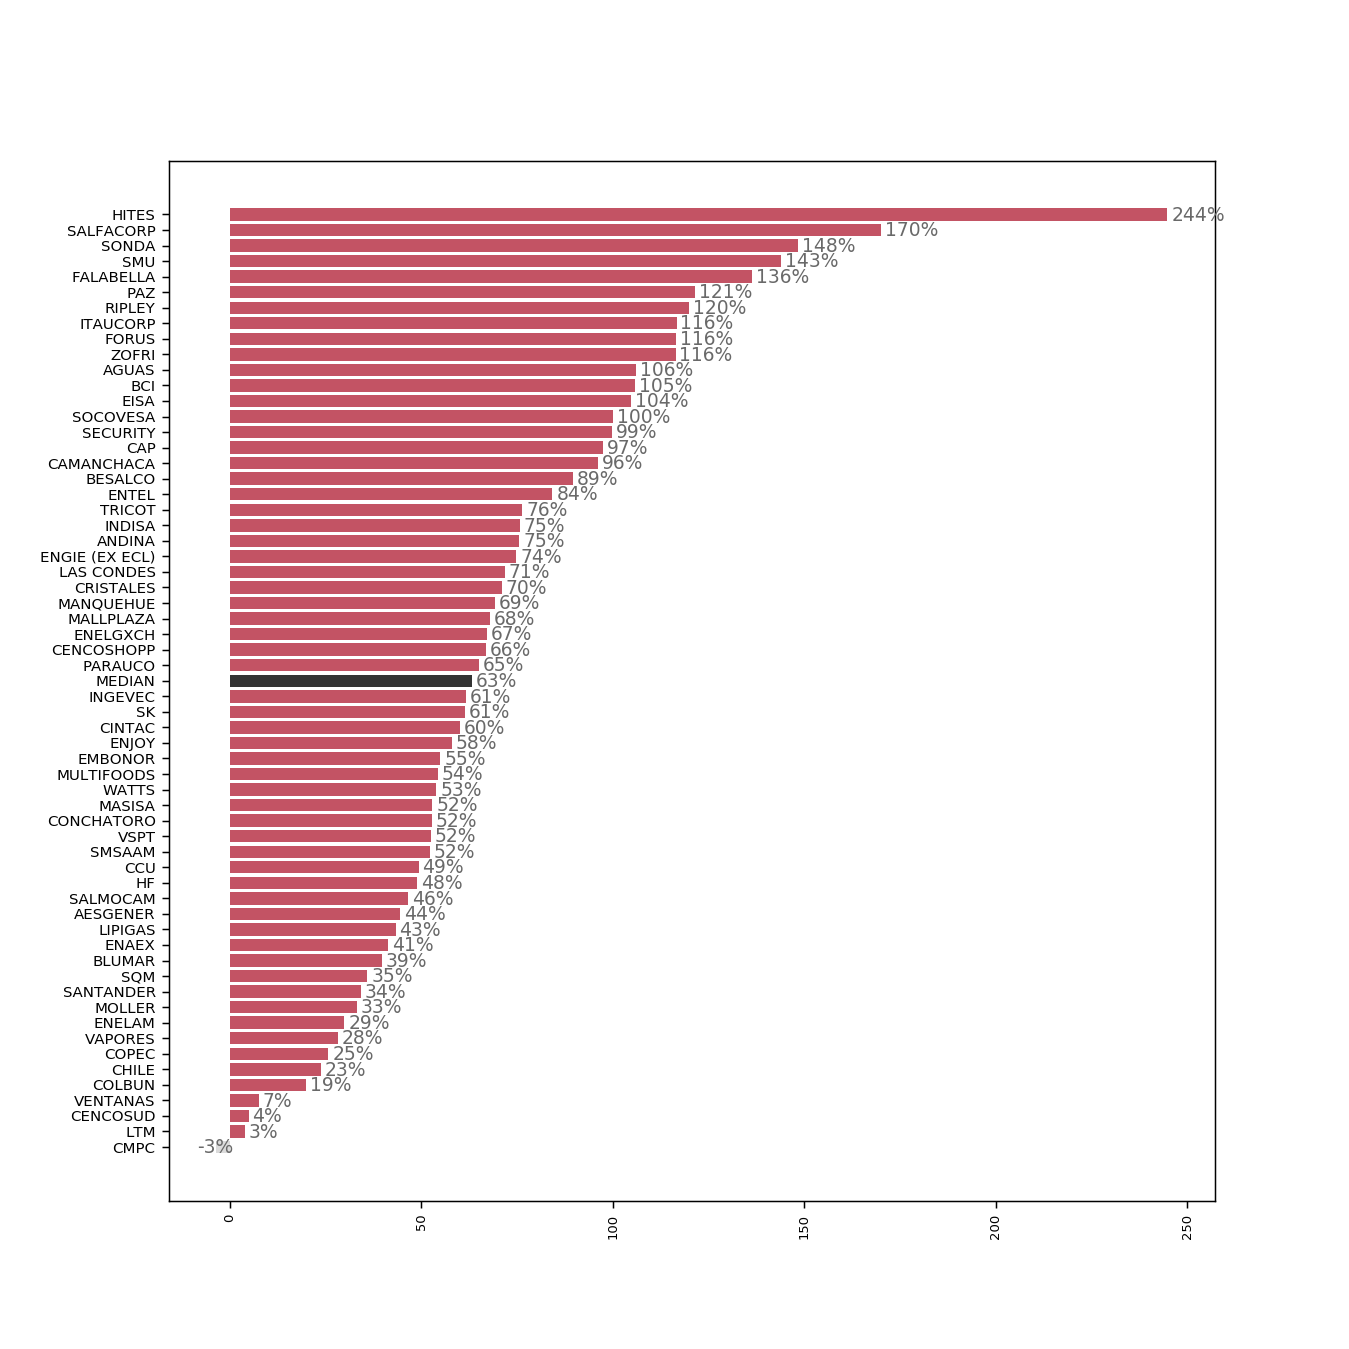

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt

pobjg=pobj.reset_index()
pobjg.drop_duplicates('Issuer_Compass_Alias',inplace=True)
pobjg.set_index('Issuer_Compass_Alias',inplace=True)
pobjg=pobjg[['Upside']]
pobjg=pobjg.dropna()

pobjg['Upside'].median()

df2 = pd.DataFrame(columns=['Upside']).T
df2['MEDIAN']=pobjg['Upside'].median()+0.01
df2=df2.T
pobjg=pobjg.append(df2).sort_values('Upside')

upside=pd.DataFrame()
upside['Upside']=pobjg['Upside']
upside=upside.sort_values('Upside')
#upside=upside.drop('NUEVAPOLAR')

col=list()
for c in upside['Upside']:
    
    if c==upside.loc['MEDIAN'][0]:
        col.append('Black')
    elif c >0:
        col.append('#B5283D')
    else: 
        col.append('lightgrey')

plt.figure(figsize=(10,10))
plt.tight_layout()
bars=plt.barh(upside.index,upside['Upside'], color=col,alpha=0.8)
plt.xticks(rotation=90,fontsize=7)
plt.yticks(fontsize=8)

for i in bars:
        try:
            plt.gca().text(i.get_width()+(-5 if i.get_width()<0 else 1), i.get_y(), 
               str(int(i.get_width()))+'%', fontsize=10,
               color='dimgrey')
        except:
            np.NaN
    
plt.savefig('upsides.png') 

Discount Rates <a id='7.'></a>
[<a href='#back'>back</a>]

In [25]:
rf=bd[bd['Account_Id']==27]
rf=rf[rf['Period']=='2018']
rf=rf[['Value']]

rf_us=pd.merge(rf,monedas,how='left',left_index=True,right_index=True)
rf_us.replace('USD',0,inplace=True)
rf_us.replace('CLP',0.003,inplace=True)
rf_us.replace('COP',0.0035,inplace=True)
rf_us['Value']=rf_us['Value']-rf_us['Issuer_Funct_Curncy']
rf_us=rf_us[['Value']]

bu=bd[bd['Account_Id']==28]
bu=bu[bu['Period']=='2018']
bu=bu[['Value']]

DE=bd[bd['Account_Id']==29]
DE=DE[DE['Period']=='2018']
DE=DE[['Value']]

ERP=bd[bd['Account_Id']==30]
ERP=ERP[ERP['Period']=='2018']
ERP=ERP[['Value']]

CDS=bd[bd['Account_Id']==31]
CDS=CDS[CDS['Period']=='2018']
CDS=CDS[['Value']]

TAX=bd[bd['Account_Id']==32]
TAX=TAX[TAX['Period']=='2018']
TAX=TAX[['Value']]

rd=bd[bd['Account_Id']==33]
rd=rd[rd['Period']=='2018']
rd=rd[['Value']]


bl=bu*(1+(1-TAX)*DE)
bl.replace(np.nan,1,inplace=True)

re=rf+bl*ERP+CDS

WACC=re*(1/(1+DE))+rd*(1-(1/(1+DE)))*(1-TAX)

WACC.rename(columns={'Value':'WACC'},inplace=True)
re.rename(columns={'Value':'Re'},inplace=True)

tasas=pd.merge(re,WACC,how='inner',left_index=True,right_index=True)
tasas=round(tasas*100,1)
tasas

,Re,WACC
Issuer_Compass_Alias,,
AESGENER,8.2,6.9
AGUAS,7.9,6.3
ANDINA,11.6,8.8
Bancolombia,9.2,NaN
BCI,8.2,NaN
BESALCO,12.9,7.6
BLUMAR,10.3,8.2
CAMANCHACA,10.2,8.1
CAP,10.5,8.7


## Consolida Stock Guide 2.0

Merges all dataframes in one<a id='merges'></a>
[<a href='#back'>back</a>]

In [38]:
### pobj=round(pobj,1)
pobj1=pd.concat([pobj], axis=1, keys=['Market Price'])
pobj1.rename(columns={'Current':'Cur.','Target':'Tgt','Upside':'Up.(%)','Recom':'Rec.'},inplace=True)

PU['Hist'] = round(PU.iloc[:,1:11].median(axis=1),2)
PU_cg=PU[['Hist','LTM','2019','2020']]
PU_cg=PU_cg.drop_duplicates()
PU_CG=pd.concat([PU_cg], axis=1, keys=['P/E'])

sg0=pobj1.join(PU_CG,how='left')

ROEg=ROE
ROEg['Hist '] = round(ROEg.iloc[:,1:11].median(axis=1),2)
ROEg.rename(columns={'LTM':'LTM ','2019':'2019 ','2020':'2020 '},inplace=True)
ROE_cg=ROEg[['Hist ','LTM ','2019 ','2020 ']]
ROE_cg=ROE_cg.drop_duplicates()
ROE_CG=pd.concat([ROE_cg], axis=1, keys=['ROE'])

sg1=sg0.join(ROE_CG)

Var_ug=var_ut
Var_ug['Hist '] = round(Var_ug.iloc[:,1:11].median(axis=1),2)
Var_ug.rename(columns={'2019':'2019 ','2020':'2020 '},inplace=True)
Var_ug=Var_ug[['Hist ','2019 ','2020 ']]
Var_UG=pd.concat([Var_ug], axis=1, keys=['EPS growth'])

sg15=sg1.join(Var_UG)

EVE['Hist  '] = round(EVE.iloc[:,1:11].median(axis=1),2)
EVE.rename(columns={'LTM':'LTM  ','2019':'2019  ','2020':'2020  '},inplace=True)
EVE_cg=EVE[['Hist  ','LTM  ','2019  ','2020  ']]
EVE_cg=EVE_cg.drop_duplicates()
EVE_CG=pd.concat([EVE_cg], axis=1, keys=['EV/EBITDA'])

sg2=sg15.join(EVE_CG)

ROIC['Hist   '] = round(ROIC.iloc[:,1:11].median(axis=1),2)
ROIC.rename(columns={'LTM':'LTM   ','2019':'2019   ','2020':'2020   '},inplace=True)
ROIC_cg=ROIC[['Hist   ','LTM   ','2019   ','2020   ']]
ROIC_cg=ROIC_cg.drop_duplicates()
ROIC_CG=pd.concat([ROIC_cg], axis=1, keys=['ROIC'])

sg25=sg2.join(ROIC_CG)

var_EBITDA['Hist    '] = round(var_EBITDA.iloc[:,1:11].median(axis=1),2)
var_EBITDA.rename(columns={'2019':'2019    ','2020':'2020    '},inplace=True)
var_EBITDA_cg=var_EBITDA[['Hist    ','2019    ','2020    ']]
var_EBITDA_cg=var_EBITDA_cg.drop_duplicates()
var_EBITDA_CG=pd.concat([var_EBITDA_cg], axis=1, keys=['EBITDA growth'])

sg3=sg25.join(var_EBITDA_CG)

tasas_CG=pd.concat([tasas],axis=1,keys=['Tasas Dcto.'])
sg45=sg3.join(tasas_CG)

dfn_e=pd.concat([DFN_E[['LTM','2019']]],axis=1,keys=['DFN/EBITDA'])
sg45=sg45.join(dfn_e)

sg45=sg45.reset_index()
Country=pd.concat([country], axis=1, keys=['Compass_Country'])
sg4=pd.merge(Country,sg45,how='right',left_index=True,right_on='Issuer_Compass_Alias')
sg4=round(sg4,1)


sg4['s']=np.where(sg4['Issuer_GICS_Sector']==sg4['Issuer_GICS_Sector'].shift(-1),0,1)
s=pd.DataFrame()
s['s']=sg4['s']
s1=pd.concat([s],axis=1,keys=['a'])

sg=pd.merge(s1,sg4,how='inner',left_index=True,right_index=True)
sg=sg.iloc[:,:-1]
#sg.to_csv('SG6')

sg=round(sg,1)

# path = r"\\cg-fileserver\Analistas\Vicente Rodriguez\sg6.xlsx"
# writer=pd.ExcelWriter(path, engine='xlsxwriter')
# sg.to_excel(writer,sheet_name='SG')
# writer.save()

sg.rename(columns={'Compass_Country':'Country','Issuer_GICS_Sector':'Sector',
                   'Issuer_Compass_Alias':'Name'},inplace=True)
sg

a        Country                  Sector            Name Market Price  \
    s Issuer_Country                                                 Cur.   
0   1          Chile  Communication Services           ENTEL       5275.1   
1   0          Chile  Consumer Discretionary           ENJOY         23.6   
2   0          Chile  Consumer Discretionary       FALABELLA       3196.0   
3   0          Chile  Consumer Discretionary           FORUS       1070.0   
4   0          Chile  Consumer Discretionary           HITES        199.0   
5   0          Chile  Consumer Discretionary       MANQUEHUE        176.7   
6   0          Chile  Consumer Discretionary             PAZ        814.4   
7   0          Chile  Consumer Discretionary          RIPLEY        362.5   
8   0          Chile  Consumer Discretionary        SOCOVESA        259.9   
9   1          Chile  Consumer Discretionary          TRICOT        542.3   
10  0          Chile        Consumer Staples          ANDINA       1888.5   
11  0          Chile        Consumer Staples          BLUMAR        249.0   
12  0          Chile        Consumer Staples      CAMANCHACA         44.8   
13  0          Chile        Consumer Staples             CCU       7200.1   
14  0          Chile        Consumer Staples        CENCOSUD        985.1   
15  0          Chile        Consumer Staples      CONCHATORO       1306.0   
16  0          Chile        Consumer Staples         EMBONOR       1360.0   
17  0          Chile        Consumer Staples              HF       1463.7   
18  0          Chile        Consumer Staples      MULTIFOODS        317.9   
19  0          Chile        Consumer Staples        SALMOCAM       5124.0   
20  0          Chile        Consumer Staples             SMU        123.0   
21  0          Chile        Consumer Staples            VSPT          6.6   
22  0          Chile        Consumer Staples           WATTS        966.0   
23  1       Colombia        Consumer Staples           Éxito          NaN   
24  0          Chile                  Energy           COPEC       6353.1   
25  0       Colombia                  Energy         Geopark          NaN   
26  1          Chile                  Energy         LIPIGAS       4099.0   
27  0          Chile              Financials             BCI      35628.0   
28  0       Colombia              Financials     Bancolombia          NaN   
29  0          Chile              Financials           CHILE         85.9   
.. ..            ...                     ...             ...          ...   
34  1          Chile             Health Care      LAS CONDES      33838.0   
35  0          Chile             Industrials         BESALCO        360.0   
36  0          Chile             Industrials            EISA        207.0   
37  0          Chile             Industrials         INGEVEC         89.9   
38  0          Chile             Industrials             LTM       8578.0   
39  0          Chile             Industrials          MOLLER        955.0   
40  0          Chile             Industrials       SALFACORP        432.0   
41  0          Chile             Industrials              SK        930.0   
42  0          Chile             Industrials          SMSAAM         54.8   
43  0          Chile             Industrials         VAPORES         24.5   
44  1          Chile             Industrials        VENTANAS        190.2   
45  1          Chile  Information Technology           SONDA        630.0   
46  0          Chile               Materials             CAP       4820.0   
47  0          Chile               Materials          CINTAC        350.0   
48  0          Chile               Materials            CMPC       1757.2   
49  0          Chile               Materials       CRISTALES       4917.0   
50  0       Colombia               Materials        Cemargos          NaN   
51  0          Chile               Materials           ENAEX       7489.6   
52  0          Chile               Materials          MASISA         31.3   


Downloads SG 2.0 to Excel <a id='sg_ex'></a>
[<a href='#back'>back</a>]

In [41]:
import openpyxl
import pandas as pd

df=sg
selectedRange = df.values.tolist()
    
#File to be pasted into
template = openpyxl.load_workbook(r"\\cg-fileserver\Analistas\Vicente Rodriguez\sg6.xlsx", read_only=False) 
temp_sheet = template["SG"] 

#Paste data from copyRange into template sheet
def pasteRange(startCol, startRow, endCol, endRow, sheetReceiving,copiedData):
    countRow = 0
    for i in range(startRow,endRow+1,1):
        countCol = 0
        for j in range(startCol,endCol+1,1):
            
            sheetReceiving.cell(row = i, column = j).value = copiedData[countRow][countCol]
            countCol += 1
        countRow += 1
 
def createData():
    startcol=1
    startrow=3
    pastingRange = pasteRange(startcol,startrow,df.shape[1]+startcol-1,df.shape[0]+startrow-1,temp_sheet,selectedRange)
    template.save(r"\\cg-fileserver\Analistas\Vicente Rodriguez\sg6.xlsx")
    print("Range copied and pasted!")
    
createData()

Range copied and pasted!


In [39]:
sg.to_csv('SG6')

a Compass_Country      Issuer_GICS_Sector Issuer_Compass_Alias  \
    s  Issuer_Country      Unnamed: 3_level_1   Unnamed: 4_level_1   
0   1           Chile  Communication Services                ENTEL   
1   0           Chile  Consumer Discretionary                ENJOY   
2   0           Chile  Consumer Discretionary            FALABELLA   
3   0           Chile  Consumer Discretionary                FORUS   
4   0           Chile  Consumer Discretionary                HITES   
5   0           Chile  Consumer Discretionary            MANQUEHUE   
6   0           Chile  Consumer Discretionary                  PAZ   
7   0           Chile  Consumer Discretionary               RIPLEY   
8   0           Chile  Consumer Discretionary             SOCOVESA   
9   1           Chile  Consumer Discretionary               TRICOT   
10  0           Chile        Consumer Staples               ANDINA   
11  0           Chile        Consumer Staples               BLUMAR   
12  0           Chile        Consumer Staples           CAMANCHACA   
13  0           Chile        Consumer Staples                  CCU   
14  0           Chile        Consumer Staples             CENCOSUD   
15  0           Chile        Consumer Staples           CONCHATORO   
16  0           Chile        Consumer Staples              EMBONOR   
17  0           Chile        Consumer Staples                   HF   
18  0           Chile        Consumer Staples           MULTIFOODS   
19  0           Chile        Consumer Staples             SALMOCAM   
20  0           Chile        Consumer Staples                  SMU   
21  0           Chile        Consumer Staples                 VSPT   
22  0           Chile        Consumer Staples                WATTS   
23  1        Colombia        Consumer Staples                Éxito   
24  0           Chile                  Energy                COPEC   
25  0        Colombia                  Energy              Geopark   
26  1           Chile                  Energy              LIPIGAS   
27  0           Chile              Financials                  BCI   
28  0        Colombia              Financials          Bancolombia   
29  0           Chile              Financials                CHILE   
.. ..             ...                     ...                  ...   
34  1           Chile             Health Care           LAS CONDES   
35  0           Chile             Industrials              BESALCO   
36  0           Chile             Industrials                 EISA   
37  0           Chile             Industrials              INGEVEC   
38  0           Chile             Industrials                  LTM   
39  0           Chile             Industrials               MOLLER   
40  0           Chile             Industrials            SALFACORP   
41  0           Chile             Industrials                   SK   
42  0           Chile             Industrials               SMSAAM   
43  0           Chile             Industrials              VAPORES   
44  1           Chile             Industrials             VENTANAS   
45  1           Chile  Information Technology                SONDA   
46  0           Chile               Materials                  CAP   
47  0           Chile               Materials               CINTAC   
48  0           Chile               Materials                 CMPC   
49  0           Chile               Materials            CRISTALES   
50  0        Colombia               Materials             Cemargos   
51  0           Chile               Materials                ENAEX   
52  0           Chile               Materials               MASISA   
53  1           Chile               Materials                  SQM   
54  0           Chile             Real Estate           CENCOSHOPP   
55  0           Chile             Real Estate            MALLPLAZA   
56  0           Chile             Real Estate              PARAUCO   
57  1           Chile             Real Estate                ZOFRI   
58  0         